# Exploratory Data Analysis
In this notebook, I will be exploring the features of the dataset that I have been assigned.
The dataset I have been assigned can be found at TODO, and has been uploaded to my Google Drive account for the purposes of performing this analysis.

The next cells will enable Google Drive access, and define the paths at which images in the dataset are held, followed by a description of the dataset.

Following this description, the image data, and the .csv file included in the dataset, will be analysed in visual form in an attempt to reach a conclusion.


# Setup
**NOTE**: If you're running this notebook from your own Colab account, or not running it from Colab, you will need to edit the following cell or failure will occur.
This cell assumes that the dataset is in a folder called "capstone" at the root of the user's Drive account, and that Drive is mounted at `/content/drive`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
base_path = "/content/drive/MyDrive/capstone/dataset"

Mounted at /content/drive


In [2]:
genuine_logos = base_path + "/output/"
counterfeit_logos = base_path + "/genLogoOutput/"

# Dataset Description

This dataset contains several files and folders, and is approximately 5 megabytes in size following decompression.

At the root of the dataset is a file named "Logos.txt". This file simply contains a list of company names separated by newlines, representing the companies whose logos are included in the dataset.

There are two folders containing JPEG-encoded images of varying resolutions, "genLogoOutput" and "output".

At the root of the dataset is a file called "file_mapping.csv", which is described in the next section.

# Mapping File (CSV) Analysis

A CSV file at the root of the dataset folder references these logo images and contains some information about them, as shown below:

In [3]:
import pandas as pd
dataframe = pd.read_csv(base_path + "/file_mapping.csv")
dataframe.head()

,Filename,Brand Name,Label,Tagline
0,output\Cowbell\000001.jpg,Cowbell,Genuine,sooo creamy sooo gooood
1,genLogoOutput\Rolex\000003.jpg,Rolex,Fake,antiophthalmic_factor crown for every accompli...
2,output\PlayStation\000005.jpg,PlayStation,Genuine,eNoS Lives.
3,output\YouTube\000004.jpg,YouTube,Genuine,Broadcast Yourself
4,genLogoOutput\Lays\000004.jpg,Lays,Fake,eNoS sprightliness .


In [4]:
dataframe.tail()

,Filename,Brand Name,Label,Tagline
820,output\Google\000002.jpg,Google,Genuine,Don’t be Evil
821,output\Nescafe\000004.jpg,Nescafe,Genuine,It all starts with a Nescafé
822,genLogoOutput\Lays\000003.jpg,Lays,Fake,eNoS life_sentence .
823,genLogoOutput\Gillette\scal_000002.jpg,Gillette,Fake,The skillful deoxyadenosine_monophosphate huma...
824,genLogoOutput\Gillette\scal_000003.jpg,Gillette,Fake,The well a military_personnel tin set_about .


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    825 non-null    object
 1   Brand Name  825 non-null    object
 2   Label       825 non-null    object
 3   Tagline     813 non-null    object
dtypes: object(4)
memory usage: 25.9+ KB


As shown by inspecting the dataset above, each image (i.e, a logo) is accompanied by:
* The path of the logo within the dataset, referred to by the Filename column.
* A brand name accompanying the logo, referred to by the column of the same name.
* A binary value ("Genuine" or "Fake") corresponding to the logo's authenticity, referred to by the Label column.
* A column named "Tagline".

It is unclear as to whether the Tagline column is of value, as the contents don't seem to make sense and could be randomly generated (for example, `The skillful deoxyadenosine_monophosphate huma.` and `eNoS sprightliness`.)

This column also contains missing/null values, as shown by the output of Pandas' .info() method.

# Observations
After analysing the data, it appears as though a solution could come in the form of a binary image classification task, based around the "Label" column.

I will now attempt to analyse some of the two classes of images using computer vision techniques in order to determine what features these separate classes have in common.

In [6]:
!pip install opencv-contrib-python cmapy
import cmapy # Used in the greyscale/colour space conversion step
import cv2
import matplotlib.pyplot as plot
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Created wheel for cmapy: filename=cmapy-0.6.6-py3-none-any.whl size=3940 sha256=08aabd9f83ea8e96d01e6a49e1a0cb2bc5b1544c9ec83a84e63bb736c493ff64
  Stored in directory: /root/.cache/pip/wheels/f5/0c/06/46d29bf8036d0f70e7b0fdbdcd38747c0a2d0595d1a69a7885
Successfully built cmapy


# Image Analysis
In this section, I will attempt to analyse the features of the two different image classes found in the dataset.

First, a genuine-class image and a counterfeit-class image are loaded for demonstration purposes.

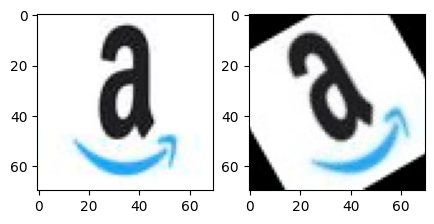

In [7]:
genuine_image_path = genuine_logos + "Amazon/000001.jpg"
genuine_sample = cv2.imread(genuine_image_path)

plot.figure(figsize=(5, 5))
plot.subplot(1, 2, 1)
plot.imshow(genuine_sample)

counterfeit_image_path = counterfeit_logos + "Amazon/000001.jpg"
counterfeit_sample = cv2.imread(counterfeit_image_path)

plot.subplot(1, 2, 2)
plot.imshow(counterfeit_sample)

## Note: Image Content
The images found within this dataset are copyright/trademark protected corporate logos. As distributing counterfeit logos would likely constitute a violation of trademark and copyright laws, it appears as though the dataset creator has simply used rotated images to represent counterfeit logos.

Regardless, this creates two disparate classes of images that can be analysed and classified.

## Perspective Transformations
In this section, some perspective transformations are performed on some of the sample images in an attempt to identify shared features.

Perspective transformations change how the image is positioned or viewed through operations such as flipping, warping, etc.

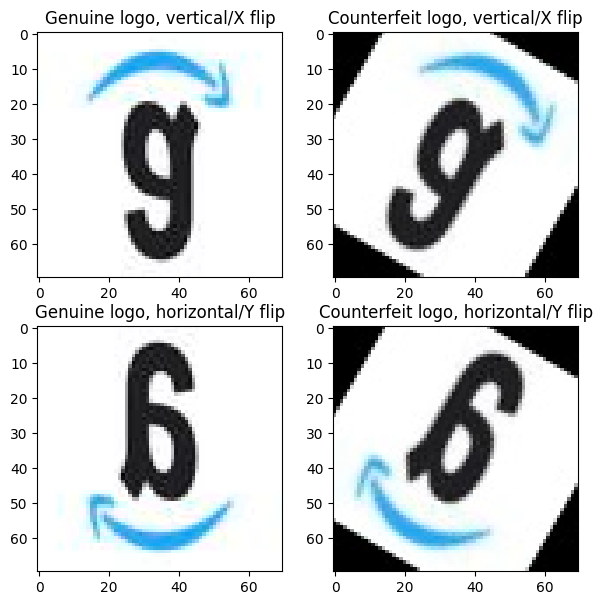

In [8]:
# Flip the images along the X (0) and Y (1) axes.

plot.figure(figsize=(7, 7))
plot.subplot(2, 2, 1)
plot.title("Genuine logo, vertical/X flip")
plot.imshow(cv2.flip(genuine_sample, 0))
plot.subplot(2, 2, 2)
plot.title("Counterfeit logo, vertical/X flip")
plot.imshow(cv2.flip(counterfeit_sample, 0))
plot.subplot(2, 2, 3)
plot.title("Genuine logo, horizontal/Y flip")
plot.imshow(cv2.flip(genuine_sample, 1))
plot.subplot(2, 2, 4)
plot.title("Counterfeit logo, horizontal/Y flip")
plot.imshow(cv2.flip(counterfeit_sample, 1))

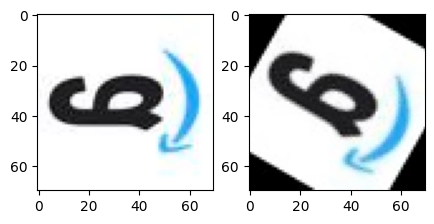

In [9]:
# Rotate the images by 90 degrees.

plot.figure(figsize=(5, 5))
plot.subplot(1, 2, 1)
plot.imshow(cv2.transpose(genuine_sample))
plot.subplot(1, 2, 2)
plot.imshow(cv2.transpose(counterfeit_sample))

## Colour Space Conversion

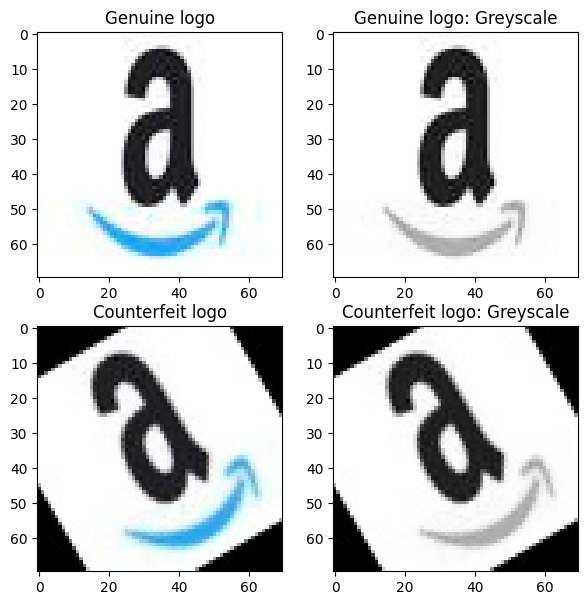

In [14]:
genuine_sample_greyscale = cv2.applyColorMap(genuine_sample, cmapy.cmap('gray'))
counterfeit_sample_greyscale = cv2.applyColorMap(counterfeit_sample, cmapy.cmap('gray'))

plot.figure(figsize=(7, 7))
plot.subplot(2, 2, 1)
plot.title("Genuine logo")
plot.imshow(genuine_sample)
plot.subplot(2, 2, 2)
plot.title("Genuine logo: Greyscale")
plot.imshow(genuine_sample_greyscale)
plot.subplot(2, 2, 3)
plot.title("Counterfeit logo")
plot.imshow(counterfeit_sample)
plot.subplot(2, 2, 4)
plot.title("Counterfeit logo: Greyscale")
plot.imshow(counterfeit_sample_greyscale)

## Histograms

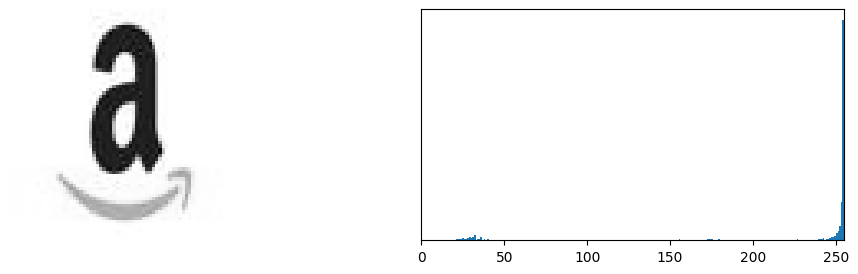

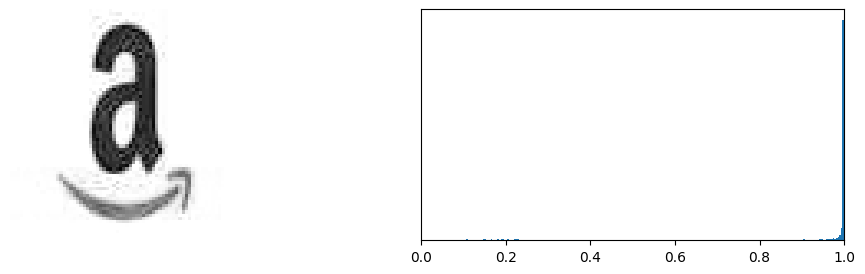

In [16]:
import skimage.exposure as skie
import skimage.filters

def show(img):
    fig, (first, second) = plot.subplots(1, 2, figsize=(12, 3))

    first.imshow(img, plot.cm.gray)
    first.set_axis_off()

    second.hist(img.ravel(), lw=0, bins=256)
    second.set_xlim(0, img.max())
    second.set_yticks([])

    plot.show()

show(genuine_sample_greyscale)
show(skie.equalize_adapthist(genuine_sample_greyscale))

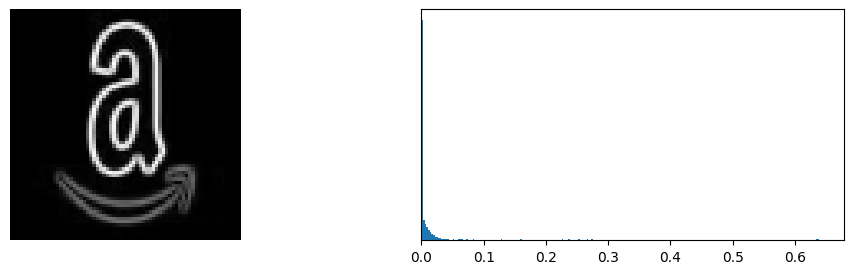

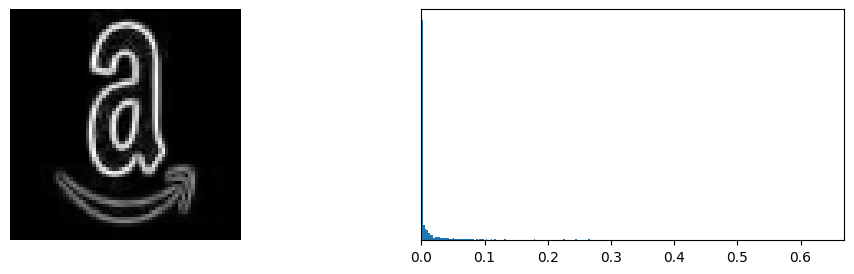

In [17]:
import skimage.color as skic
import skimage.filters as skif

img = skic.rgb2gray(genuine_sample)
show(skif.sobel(img))

img2 = skic.rgb2gray(skie.equalize_adapthist(genuine_sample))
show(skif.sobel(img2))

## Artificial Noise


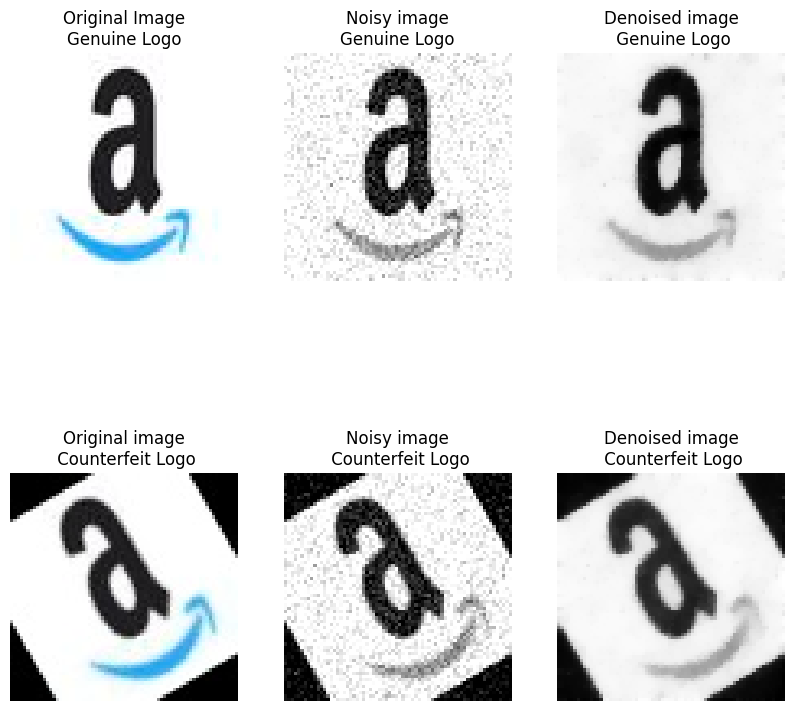

In [18]:
import skimage.util as sku
import skimage

genuine_sample_noised = sku.random_noise(skic.rgb2gray(genuine_sample))
genuine_sample_denoised = skimage.restoration.denoise_tv_bregman(genuine_sample_noised, 5.)

counterfeit_sample_noised = sku.random_noise(skic.rgb2gray(counterfeit_sample))
counterfeit_sample_denoised = skimage.restoration.denoise_tv_bregman(counterfeit_sample_noised, 5.)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plot.subplots(ncols=3, nrows=2, figsize=(10, 10))

ax1.imshow(genuine_sample)
ax1.set_title('Original Image\nGenuine Logo')
ax1.set_axis_off()

ax2.imshow(genuine_sample_noised, cmap ='gray')
ax2.set_title('Noisy image\nGenuine Logo')
ax2.set_axis_off()

ax3.imshow(genuine_sample_denoised, cmap = 'gray')
ax3.set_title('Denoised image\n Genuine Logo')
ax3.set_axis_off()

ax4.imshow(counterfeit_sample)
ax4.set_title('Original image\n Counterfeit Logo')
ax4.set_axis_off()

ax5.imshow(counterfeit_sample_noised, cmap ='gray')
ax5.set_title('Noisy image\n Counterfeit Logo')
ax5.set_axis_off()

ax6.imshow(counterfeit_sample_denoised, cmap = 'gray')
ax6.set_title('Denoised image\n Counterfeit Logo')
ax6.set_axis_off()

## Edge Detection

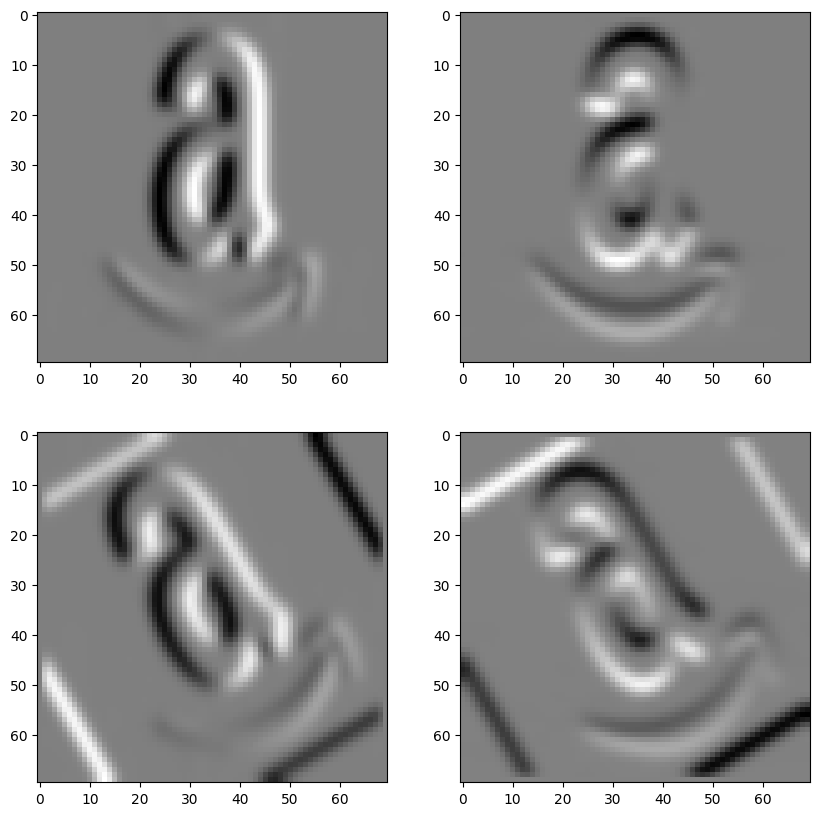

In [ ]:
sobel_img_1=cv2.cvtColor(genuine_sample,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(counterfeit_sample,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

plot.figure(figsize=(10,10))
plot.subplot(221)
plot.imshow(sobelx_img_1, cmap = 'gray')
plot.subplot(222)
plot.imshow(sobely_img_1, cmap = 'gray')
plot.subplot(223)
plot.imshow(sobelx_img_2, cmap = 'gray')
plot.subplot(224)
plot.imshow(sobely_img_2, cmap = 'gray')


# Conclusions
After analysing the mapping file and the image files provided in the dataset, it appears as though feature extraction with OpenCV may not be a suitable technique to solve this classification problem.

However, as the mapping file contains a binary label, a suitable approach may be classification via deep learning with the assistance of Keras and/or TensorFlow.

This will be explored in the Predictive Data Analysis phase.